jequitinhonha

BenchmarkTools.Trial: 221 samples with 1 evaluation per sample.
 Range (min … max):  168.243 ms … 547.278 ms  ┊ GC (min … max):  0.00% … 64.54%
 Time  (median):     193.815 ms               ┊ GC (median):     5.78%
 Time  (mean ± σ):   243.587 ms ± 119.858 ms  ┊ GC (mean ± σ):  25.84% ± 22.02%

   ▁▂██▅
  ▇█████▄▃▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▃▃▃▄▃▄▃▃ ▃
  168 ms           Histogram: frequency by time          538 ms <

 Memory estimate: 290.89 MiB, allocs estimate: 2458815.

1.5G

BenchmarkTools.Trial: 1 sample with 1 evaluation per sample.
 Single result which took 2.644 s (12.94% GC) to evaluate,
 with a memory estimate of 7.97 GiB, over 13127982 allocations.

BenchmarkTools.Trial: 2 samples with 1 evaluation per sample.
 Range (min … max):  3.307 s …    3.525 s  ┊ GC (min … max): 12.60% … 20.44%
 Time  (median):     3.416 s               ┊ GC (median):    16.64%
 Time  (mean ± σ):   3.416 s ± 153.904 ms  ┊ GC (mean ± σ):  16.64% ±  5.54%

  █                                                        █
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.31 s         Histogram: frequency by time         3.52 s <

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [29]:
df = pd.read_csv("times_testing.csv")

In [30]:
mean_jeq_py = df['0'].mean()
median_jeq_py = df['0'].median()
std_jeq_py = df['0'].std()

In [31]:
mean_jeq_jl = np.float64(0.243587)
median_jeq_jl = np.float64(0.193815)
std_jeq_jl = np.float64(0.119858)

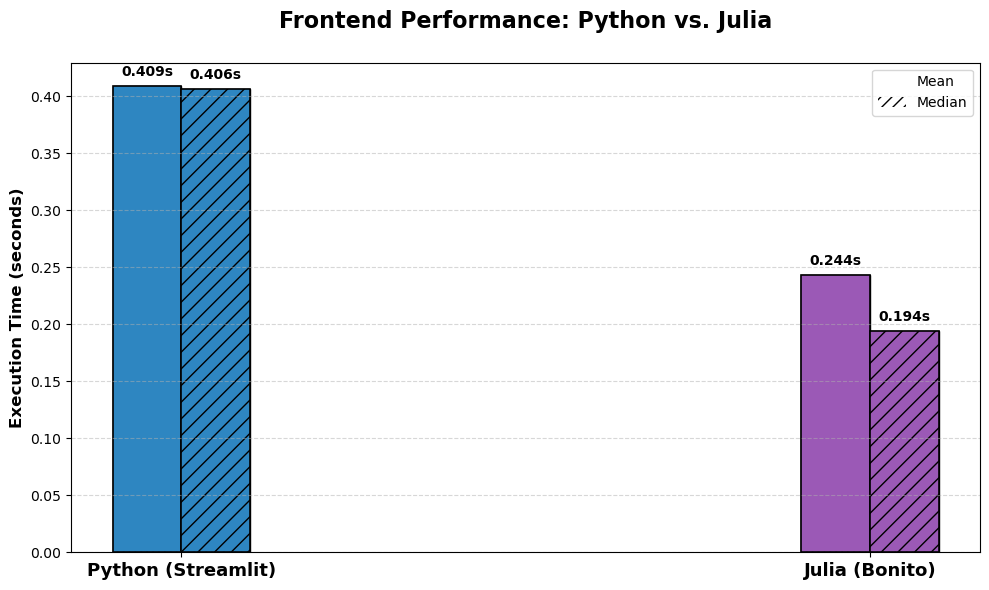

In [59]:
labels = ['Python (Streamlit)', 'Julia (Bonito)']
means = [mean_jeq_py, mean_jeq_jl]
medians = [median_jeq_py, median_jeq_jl]

x = np.arange(len(labels))  # Label locations
width = 0.10                # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
rects1 = ax.bar(x - width/2, means, width, label='Mean Time', color='#3498db', edgecolor='black')
rects2 = ax.bar(x + width/2, medians, width, label='Median Time', color='#e74c3c', edgecolor='black')

python_color = '#2E86C1'
julia_color = '#9B59B6' 

# --- 3. STYLING & LABELS ---
ax.bar(x[0] - width/2, means[0], width, color=python_color, 
        edgecolor='black', linewidth=1.2)
ax.bar(x[0] + width/2, medians[0], width, color=python_median_color, 
       label='Python Median', edgecolor='black', linewidth=1.2, hatch = '//')

# Julia Bars
ax.bar(x[1] - width/2, means[1], width, color=julia_color, 
        edgecolor='black', linewidth=1.2)
ax.bar(x[1] + width/2, medians[1], width, color=julia_color, 
        edgecolor='black', linewidth=1.2, hatch = '//')

# 4. Styling
ax.set_ylabel('Execution Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('Frontend Performance: Python vs. Julia', fontsize=16, fontweight='bold', pad=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of bars
def autolabel(x_pos, height):
    ax.annotate(f'{height:.3f}s',
                xy=(x_pos, height),
                xytext=(0, 5), 
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# Applying labels
autolabel(x[0] - width/2, means[0])
autolabel(x[0] + width/2, medians[0])
autolabel(x[1] - width/2, means[1])
autolabel(x[1] + width/2, medians[1])

mean_patch = mpatches.Patch(facecolor='white', label='Mean')
median_patch = mpatches.Patch(facecolor='white', label='Median', hatch='///')

ax.legend(handles=[mean_patch, median_patch])

plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()